In [51]:
import csv
import pandas as pd
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [52]:
df = pd.read_csv('wiki-vote.csv', sep='\t', lineterminator='\r')

In [53]:
df.head()

,From,To
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478


In [72]:
with open("wiki-vote.csv", 'rb') as inf:
    next(inf, '')   # skip a line
    G = nx.read_edgelist(inf, create_using=nx.DiGraph)

In [73]:
G.size()

103689

In [74]:
G.order()

7115

In [99]:
#nx.draw(G, pos=nx.spring_layout(G)) #downgrade manual de decorator a versión 4.3.0

# Centrality measures

In [125]:
df2 = pd.DataFrame(dict(
    indegree = nx.in_degree_centrality(G),
    outdegree = nx.out_degree_centrality(G),
    closeness = nx.closeness_centrality(G),
    eigenvector = nx.eigenvector_centrality(G),
))
df2

,indegree,outdegree,closeness,eigenvector
30,0.003233,0.000703,0.212189,2.350887e-03
1412,0.004076,0.000000,0.200967,1.490275e-03
3352,0.037110,0.038375,0.274980,8.679366e-02
5254,0.037250,0.004639,0.276567,7.851246e-02
5543,0.020382,0.019258,0.261771,4.695641e-02
...,...,...,...,...
8270,0.000000,0.000281,0.000000,1.603570e-27
8272,0.000000,0.000141,0.000000,1.603570e-27
8273,0.000000,0.000141,0.000000,1.603570e-27
8150,0.000000,0.000281,0.000000,1.603570e-27


# Correlations between centrality measures

In [111]:
#Correlación Pearson: 
stats.pearsonr(df2['indegree'], df2['outdegree'])

(0.31763976337716515, 1.585336146412098e-166)

In [119]:
#Correlación spearman:
stats.spearmanr(df2['indegree'], df2['outdegree'])

SpearmanrResult(correlation=0.009900430275669428, pvalue=0.4037292079784168)

In [113]:
#Correlación kendall:
stats.kendalltau(df2['indegree'], df2['outdegree'])

KendalltauResult(correlation=-0.005098092231689179, pvalue=0.589562560204802)

# Correlation matrix

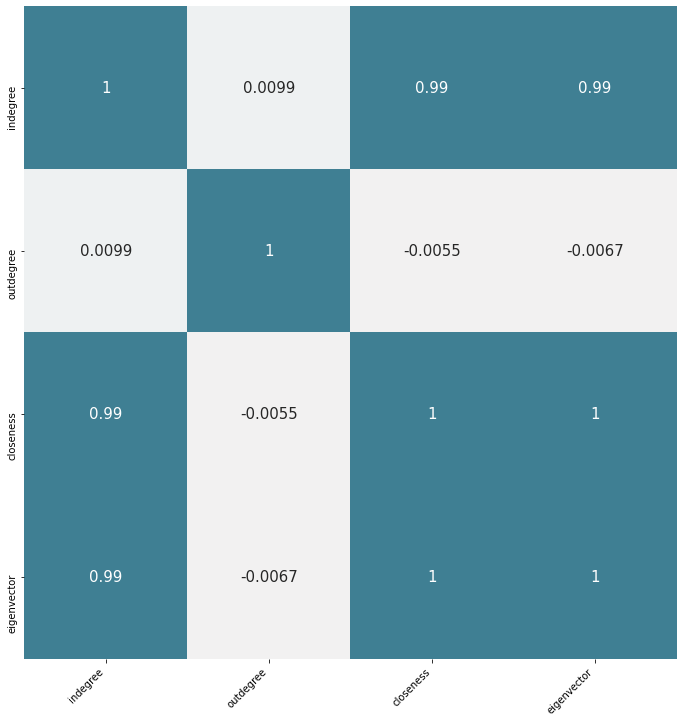

In [117]:
#matriz de correlación de Spearman
corr_matrix = df2.corr(method='spearman')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 15},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

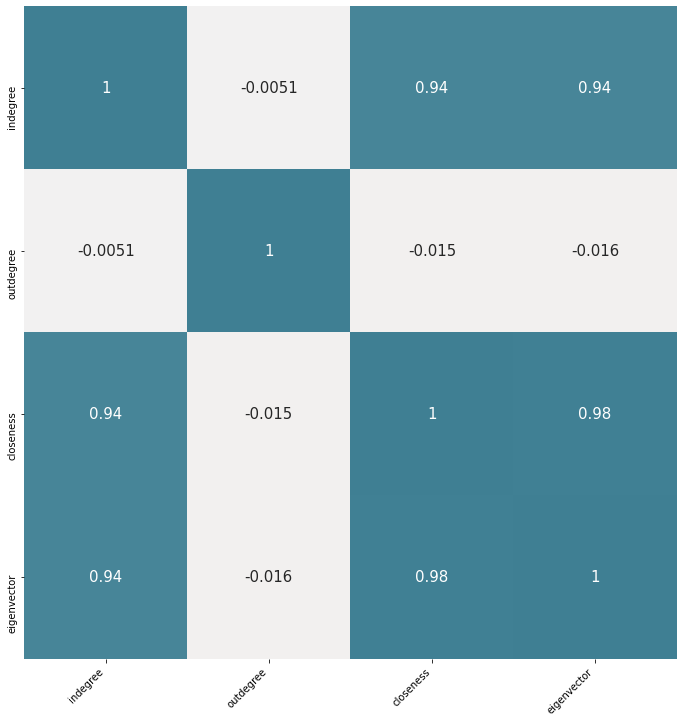

In [120]:
#matriz de correlación de Kendall
corr_matrix = df2.corr(method='kendall')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 15},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)